In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.noise import *
from scipy.signal.windows import dpss
import sys

Lambda_idx = 0
nbins = 300
# Lambda_idx = int(sys.argv[1])
# nbins = int(sys.argv[2])

Lambda = Lambdas[Lambda_idx]

# CCAT-prime
zmin = 3.5
zmax = 8.1

Omega_field = 8 * (np.pi/180)**2 #rad^2
Pei = 2.3e4 #Mpc^3 kJy^2 /sr^2 
chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

# get CMB lensing component
from LIMxCMBL.kernels import get_f_Kkappa
f_WkD = get_f_Kkappa()

from LIMxCMBL.cross_spectrum import *
ClKK = d_chib_integral(f_WkD, f_WkD) #[Mpc]^2


# beam=1.4, noise=7
from scipy.interpolate import interp1d
N0_ells = np.logspace(1, np.log10(5000), 500)
with open('LIMxCMBL/N0.npy', 'rb') as f:
    N0 = np.load(f)
    
f_N0 = interp1d(x = N0_ells, y = N0)


# if no high pass IKappa
from  LIMxCMBL.kernels import *
f_KLIM   = get_f_KI()
f_Kkappa = get_f_Kkappa()

f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)


oup_fname = '/scratch/users/delon/LIMxCMBL/eHIeHI/mpmath_zmin_%.5f_zmax_%.5f_Lambda_idx_%.d_from_quad_nbins_%d.npy'%(zmin, zmax, Lambda_idx, nbins)
print(oup_fname)

/scratch/users/delon/LIMxCMBL/eHIeHI/mpmath_zmin_3.50000_zmax_8.10000_Lambda_idx_0_from_quad_nbins_300.npy


In [2]:
chi_bin_edges = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), nbins + 1)
chi_bin_centers = (chi_bin_edges[1:] + chi_bin_edges[:-1])/2
dchi = np.mean(np.diff(chi_bin_edges))



In [3]:
from scipy.interpolate import LinearNDInterpolator


In [4]:
tmp_chibs = []
tmp_log_deltas = []
tmp_fnctn = []
for i in range(len(chibs)):
    for j in range(len(deltas)):
        tmp_chibs += [chibs[i]]
        tmp_log_deltas += [np.log10(deltas[j])]
        tmp_fnctn += [inner_dkparp_integral[:,i,j]]
        
new_f_inner_integral = LinearNDInterpolator(list(zip(tmp_chibs, tmp_log_deltas)), tmp_fnctn)


In [5]:
X, Y = np.meshgrid(chibs, np.log10(deltas))
new_f_inner_integral(X, Y).shape

(128, 256, 100)

In [6]:
def f_unfiltered_auto(chi, chip):
    ret = 4/(chi + chip)**2
    ret *= f_KLIM_windowed(chi) * f_KLIM_windowed(chip)
    _delta = np.abs((chi - chip) / (chi + chip))
    
    ### bound delta
    _delta = np.where(_delta > 0.7, 0.7, _delta)
    _delta = np.where(_delta < 1e-6, 1e-6, _delta)
    
    _chib  = (chi + chip) / 2
    X, Y = np.meshgrid(_chib, np.log10(_delta))
    return ret * new_f_inner_integral(X,Y)

In [7]:
unfiltered_auto = np.zeros((100, nbins, nbins))
for i in trange(nbins):
    for j in range(nbins):
        unfiltered_auto[:, i, j] = f_unfiltered_auto(chi_bin_centers[i], chi_bin_centers[j])

100%|██████████| 300/300 [00:27<00:00, 11.11it/s]


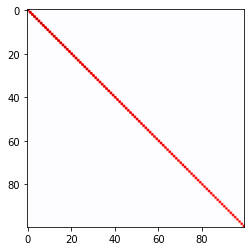

In [8]:
oup_fname = '/scratch/users/delon/LIMxCMBL/eHIeHI/zmin_%.5f_zmax_%.5f_Lambda_idx_%.d_from_quad_nbins_%d.npy'%(zmin, zmax, Lambda_idx, 100)
cov = Pei * np.load(oup_fname)
vb = np.max(np.abs(cov))
plt.imshow(cov, vmin = -vb, vmax = vb, cmap='seismic')

1.3008839690322687e-05 2.139459786687462e-05


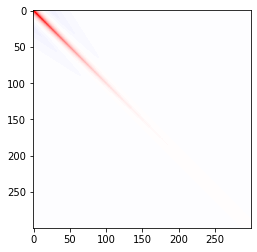

1.3018055169051456e-05 2.139459786687462e-05


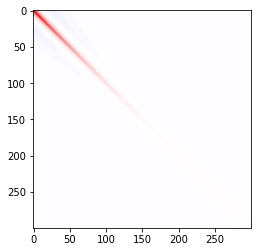

1.30279670293202e-05 2.139459786687462e-05


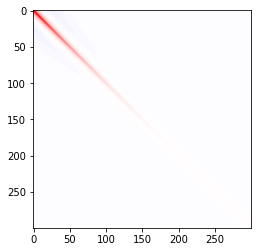

1.30386045382336e-05 2.139459786687462e-05


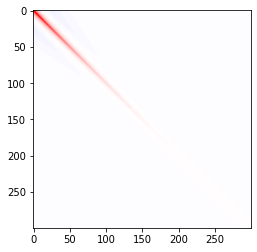

1.3049993540967461e-05 2.139459786687462e-05


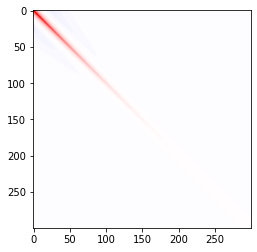

1.3062155157899175e-05 2.139459786687462e-05


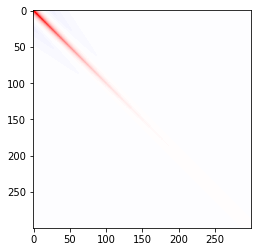

1.3075104175510093e-05 2.139459786687462e-05


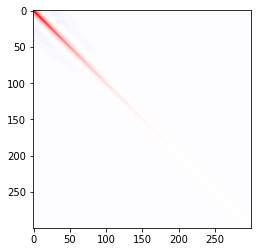

1.3088847627766306e-05 2.139459786687462e-05


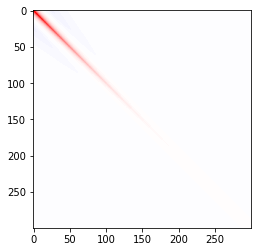

1.3103383055687321e-05 2.139459786687462e-05


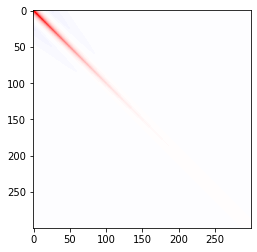

1.3118696334621991e-05 2.139459786687462e-05


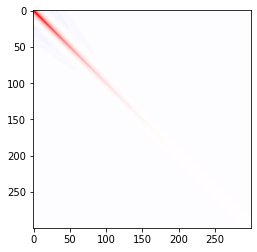

1.3134759083938307e-05 2.139459786687462e-05


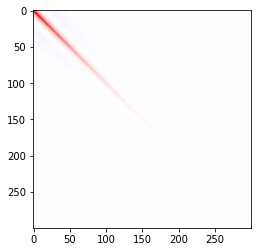

1.3151525407031067e-05 2.139459786687462e-05


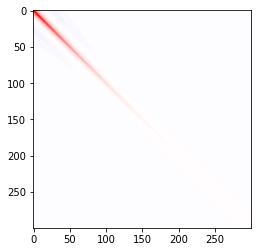

1.3168929172662397e-05 2.139459786687462e-05


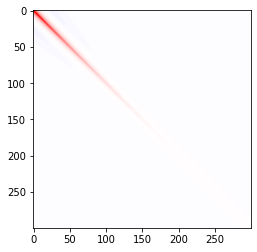

1.3186880452867357e-05 2.139459786687462e-05


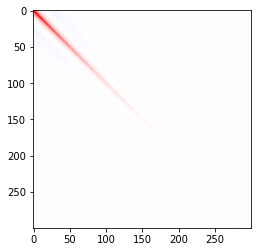

1.3205261497976237e-05 2.139459786687462e-05


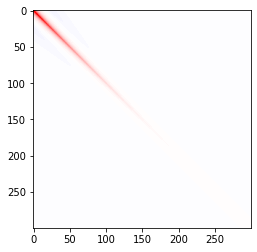

1.3223922490257458e-05 2.139459786687462e-05


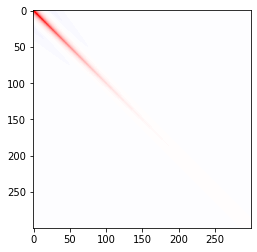

1.3242676700243697e-05 2.139459786687462e-05


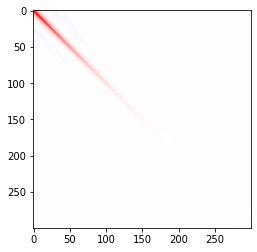

1.3261295391476493e-05 2.139459786687462e-05


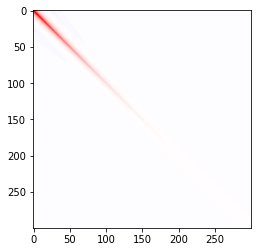

1.327950247877745e-05 2.139459786687462e-05


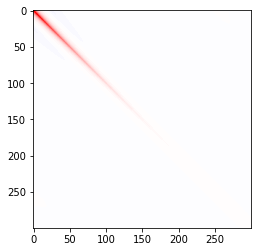

1.3296968616271256e-05 2.139459786687462e-05


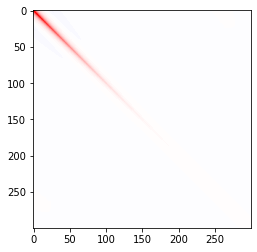

1.3313305198371906e-05 2.139459786687462e-05


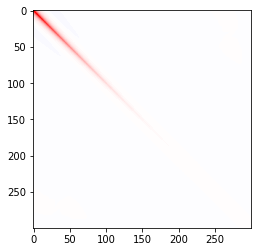

1.3328058594037681e-05 2.139459786687462e-05


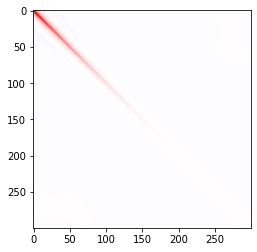

1.3340703824728427e-05 2.139459786687462e-05


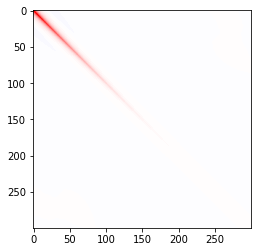

1.3350639125035553e-05 2.139459786687462e-05


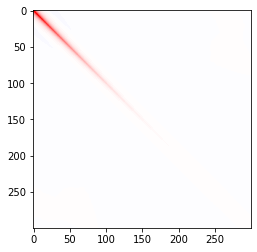

1.335718102402642e-05 2.139459786687462e-05


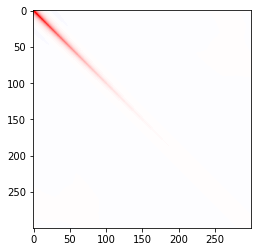

1.3359560418097208e-05 2.139459786687462e-05


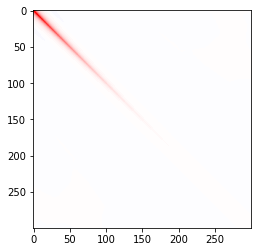

1.3356920194183867e-05 2.139459786687462e-05


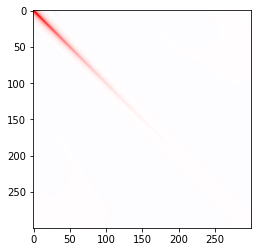

1.3348315439805957e-05 2.139459786687462e-05


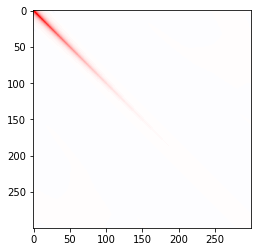

1.3332716396043798e-05 2.139459786687462e-05


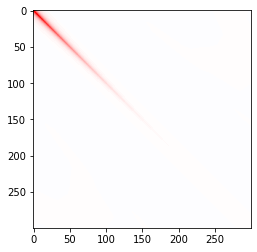

1.3309015806663676e-05 2.139459786687462e-05


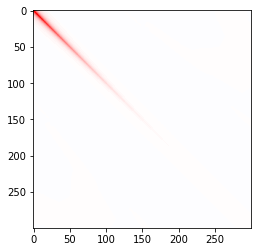

1.327604070430883e-05 2.139459786687462e-05


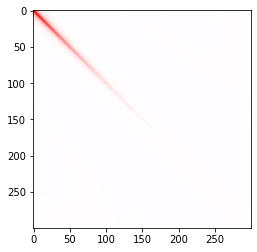

1.3232571832201624e-05 2.139459786687462e-05


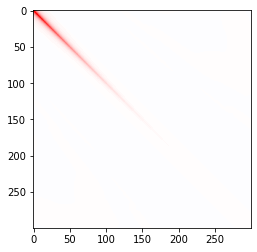

1.3177369404488723e-05 2.139459786687462e-05


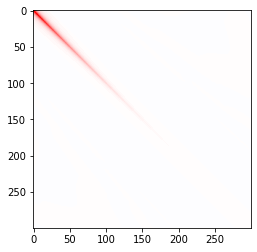

1.3109208194930623e-05 2.139459786687462e-05


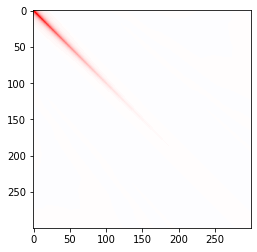

1.3026922693369989e-05 2.139459786687462e-05


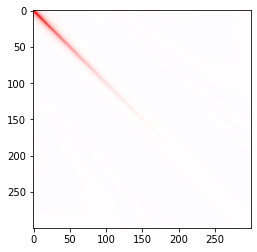

1.2929461951809832e-05 2.139459786687462e-05


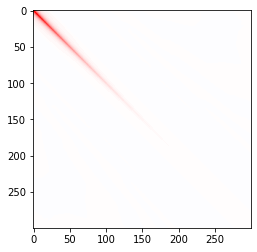

1.2815955187802953e-05 2.139459786687462e-05


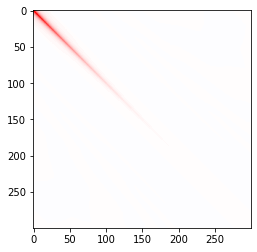

1.2685784622019435e-05 2.139459786687462e-05


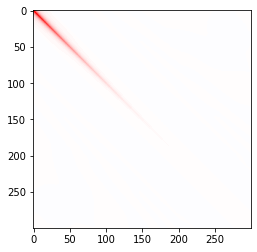

1.2538665642604271e-05 2.139459786687462e-05


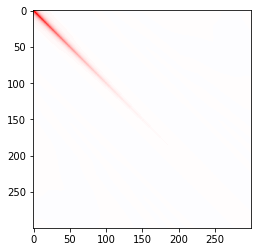

1.2374725469433361e-05 2.139459786687462e-05


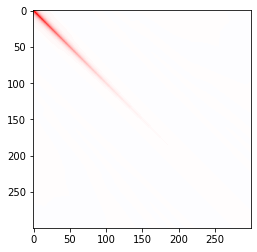

1.219457574115901e-05 2.139459786687462e-05


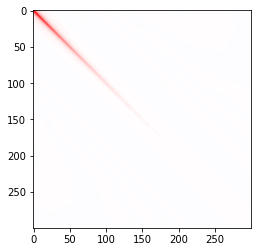

1.1999365316756495e-05 2.139459786687462e-05


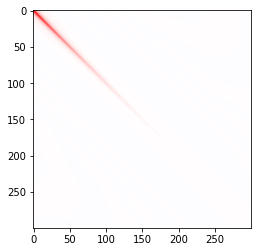

1.1790800757915195e-05 2.139459786687462e-05


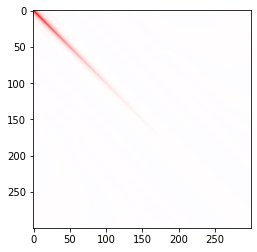

1.1571115676423792e-05 2.139459786687462e-05


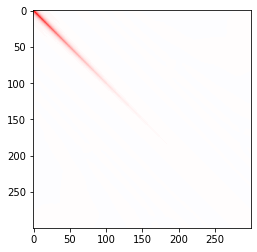

1.1342966774797146e-05 2.139459786687462e-05


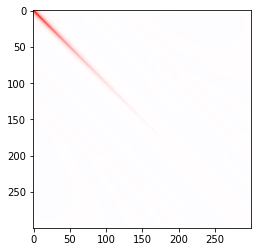

1.1109218904416319e-05 2.139459786687462e-05


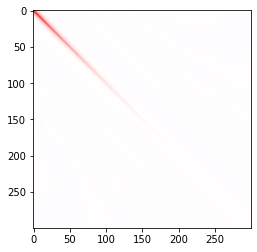

1.0872457947126956e-05 2.139459786687462e-05


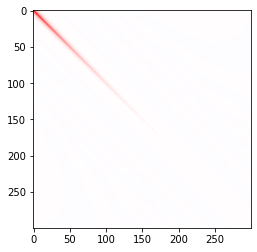

1.0636008814873532e-05 2.139459786687462e-05


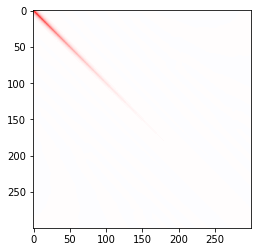

1.04023464819316e-05 2.139459786687462e-05


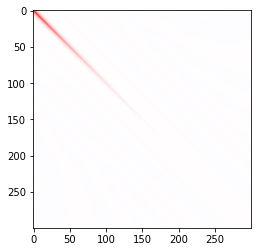

1.0172121147595247e-05 2.139459786687462e-05


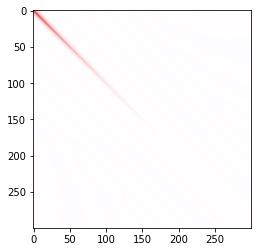

9.944084025886526e-06 2.139459786687462e-05


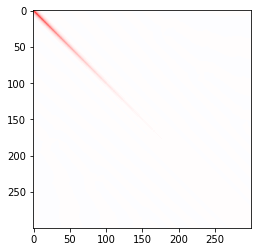

9.715248872843397e-06 2.139459786687462e-05


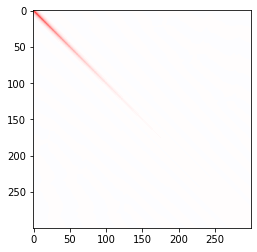

9.481488342937904e-06 2.139459786687462e-05


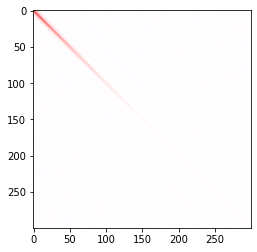

9.238619393155101e-06 2.139459786687462e-05


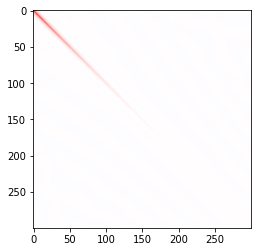

8.977226006930461e-06 2.139459786687462e-05


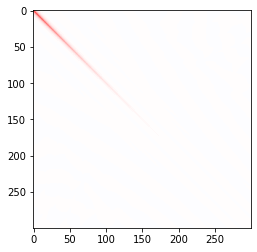

8.691145180219944e-06 2.139459786687462e-05


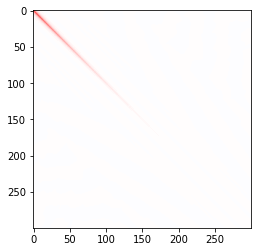

8.377407884888653e-06 2.139459786687462e-05


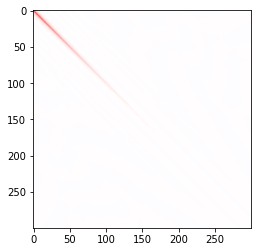

8.038171043126665e-06 2.139459786687462e-05


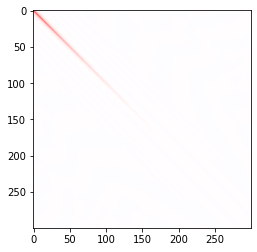

7.682579665681032e-06 2.139459786687462e-05


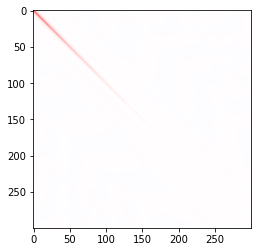

7.3252942794578485e-06 2.139459786687462e-05


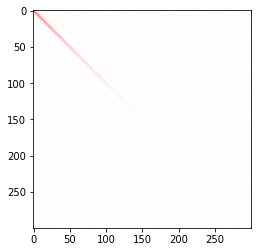

6.9828489495062766e-06 2.139459786687462e-05


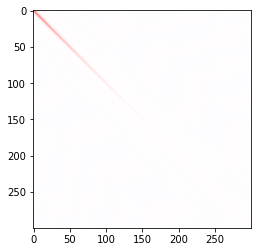

6.669240954964031e-06 2.139459786687462e-05


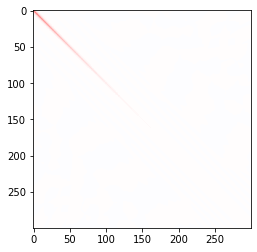

6.390284859682992e-06 2.139459786687462e-05


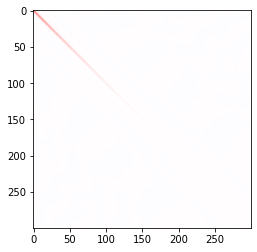

6.138725173888696e-06 2.139459786687462e-05


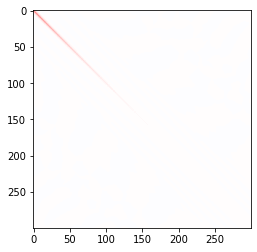

5.895665834381554e-06 2.139459786687462e-05


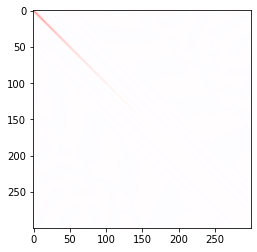

5.637875666551664e-06 2.139459786687462e-05


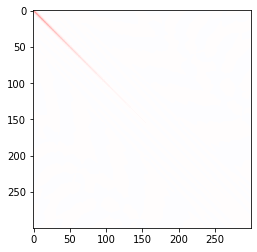

5.3496242758948425e-06 2.139459786687462e-05


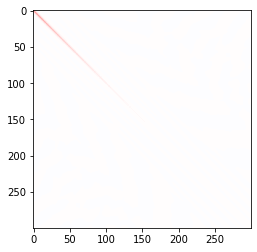

5.039230016435576e-06 2.139459786687462e-05


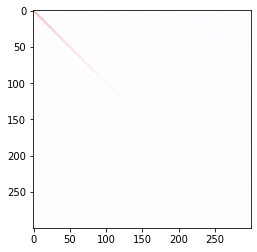

4.736418297195156e-06 2.139459786687462e-05


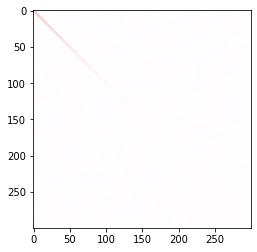

4.468513250842123e-06 2.139459786687462e-05


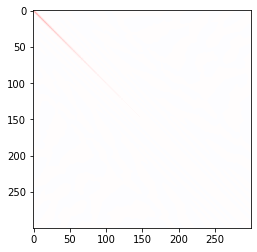

4.241301004058015e-06 2.139459786687462e-05


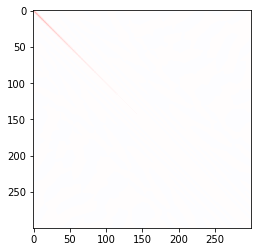

4.029374285594795e-06 2.139459786687462e-05


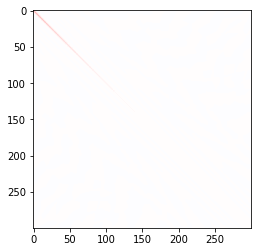

3.8022812997583135e-06 2.139459786687462e-05


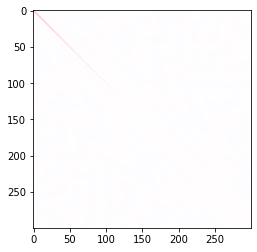

3.5577749091719604e-06 2.139459786687462e-05


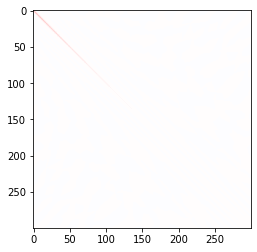

3.3257549919893534e-06 2.139459786687462e-05


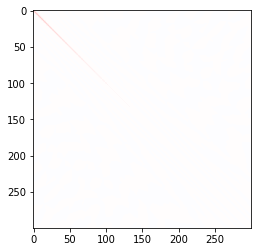

3.12712682852588e-06 2.139459786687462e-05


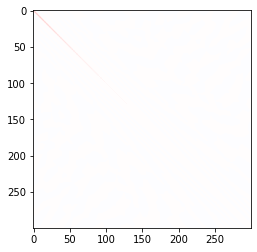

2.944285380222517e-06 2.139459786687462e-05


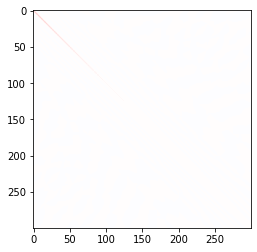

2.753123537181141e-06 2.139459786687462e-05


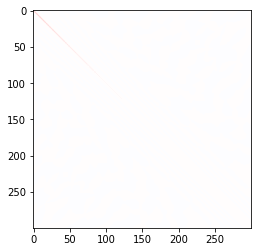

2.5642718764550627e-06 2.139459786687462e-05


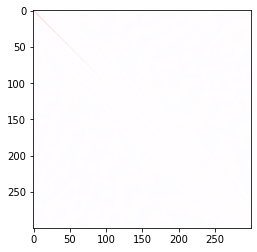

2.3970896384680706e-06 2.139459786687462e-05


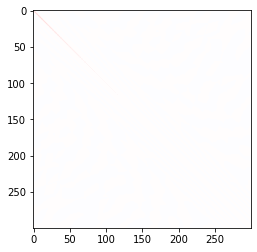

2.240361919615504e-06 2.139459786687462e-05


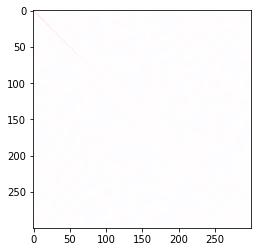

2.0834740774780556e-06 2.139459786687462e-05


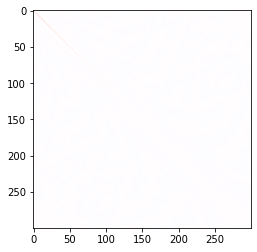

1.9384942523889974e-06 2.139459786687462e-05


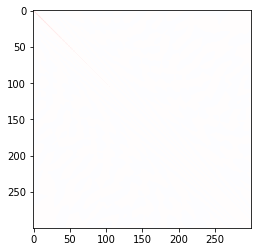

1.8040467924776566e-06 2.139459786687462e-05


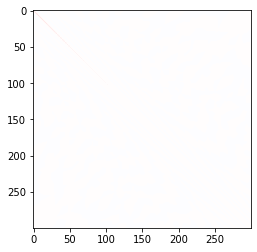

1.673865160193093e-06 2.139459786687462e-05


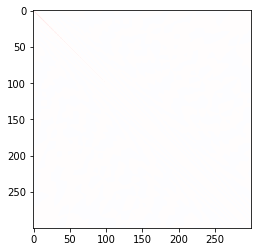

1.5533748519091856e-06 2.139459786687462e-05


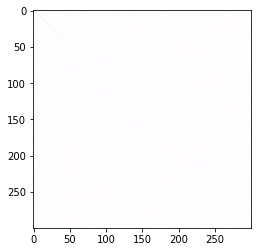

1.4397077583073052e-06 2.139459786687462e-05


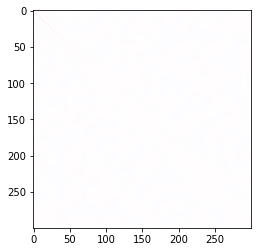

1.332907613673136e-06 2.139459786687462e-05


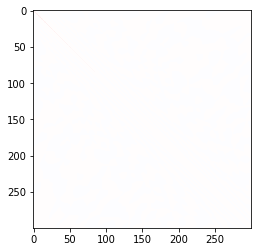

1.2331701494049884e-06 2.139459786687462e-05


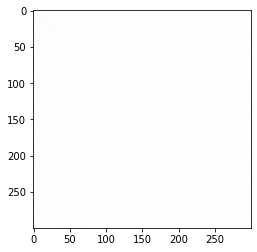

1.1396416762562758e-06 2.139459786687462e-05


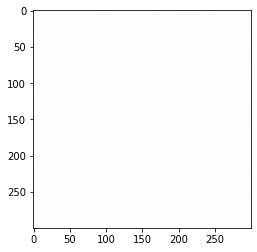

1.0523891113813646e-06 2.139459786687462e-05


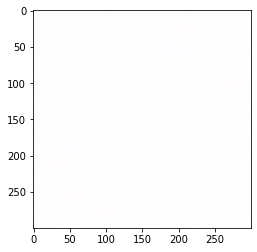

9.709437393779493e-07 2.139459786687462e-05


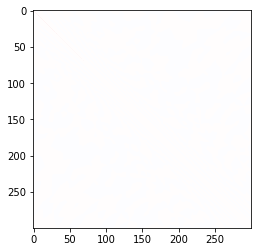

8.950726813070882e-07 2.139459786687462e-05


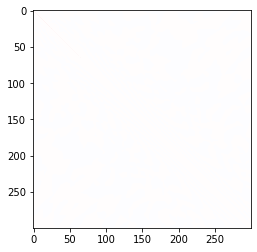

8.244061364116971e-07 2.139459786687462e-05


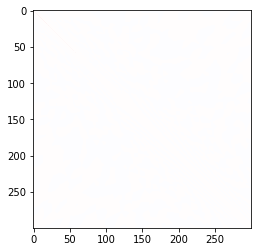

7.587063900878971e-07 2.139459786687462e-05


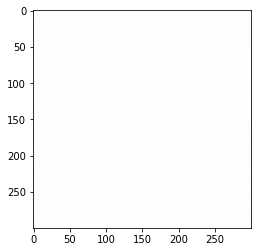

6.977159423583631e-07 2.139459786687462e-05


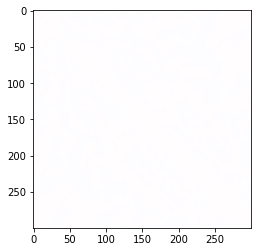

6.411570632065903e-07 2.139459786687462e-05


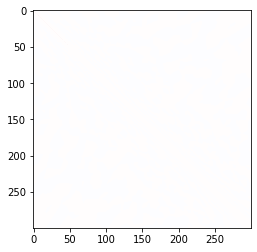

5.887528611262881e-07 2.139459786687462e-05


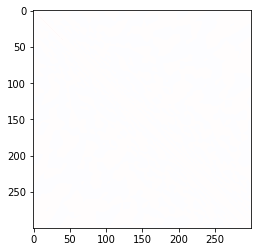

5.402413303134816e-07 2.139459786687462e-05


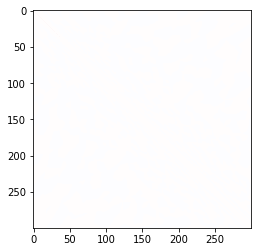

4.953762560541771e-07 2.139459786687462e-05


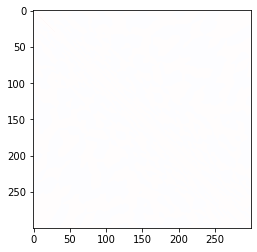

In [9]:
for ell_idx in range(len(ells)):
#     tmb_vb = np.max(np.abs(unfiltered_auto[ell_idx]))
    plt.imshow(unfiltered_auto[ell_idx], vmin = -vb, vmax = vb, cmap = 'seismic')
    print(np.max(np.abs(unfiltered_auto[ell_idx])), vb)
    plt.show()

In [10]:
np.save('/scratch/users/delon/LIMxCMBL/I_auto/I_auto_nbins_%d_zmin_%.1f_zmax_%.1f.npy'%(nbins, zmin, zmax), unfiltered_auto)